In [1]:
import os
import pickle
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import Sequence
from keras.models import Sequential
from keras.models import load_model
from keras.applications import MobileNet
from keras.layers import Dense, Flatten, Dropout
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
batch_size = 32
dataset_code = 'B'
model_name = 'MobileNet'
data_saved_dir = r'E:\Post-Flood-Disaster-Management\Classification\pickle_data'
model_saved_dir = r'E:\Post-Flood-Disaster-Management\Classification\models'

floodnet_testing = f'{data_saved_dir}\\floodnet_testing.pkl'
aider_testing = f'{data_saved_dir}\AIDER_testing.pkl'
floodAreaSeg_testing = f'{data_saved_dir}\FloodAreaSeg_testing.pkl'
download_testing = f'{data_saved_dir}\Downloaded_testing.pkl'

In [3]:
mobile_net = MobileNet(include_top=False, weights='imagenet', input_shape=(256, 256, 3))

model = Sequential()
model.add(mobile_net)

for layer in model.layers:
    layer.trainable = False

model.add(Flatten())
model.add(Dense(units=2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 8, 8, 1024)        3228864   
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense (Dense)               (None, 2048)              134219776 
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 137450689 (524.33 MB)
Trainable params: 134221825 (512.02 MB)
Non-trainable params: 3228864 (12.32 MB)
_____

In [4]:
best_model = load_model(f'{model_saved_dir}\B_MobileNet\B_MobileNet-weights-improvement-05-0.95.hdf5')
print('Best model loaded ...')

Best model loaded ...


### FloodNet

Testing images: (62, 256, 256, 3)
Class Balance: [0: 53, 1: 9]
2/2 [==============================] - 2s 457ms/step


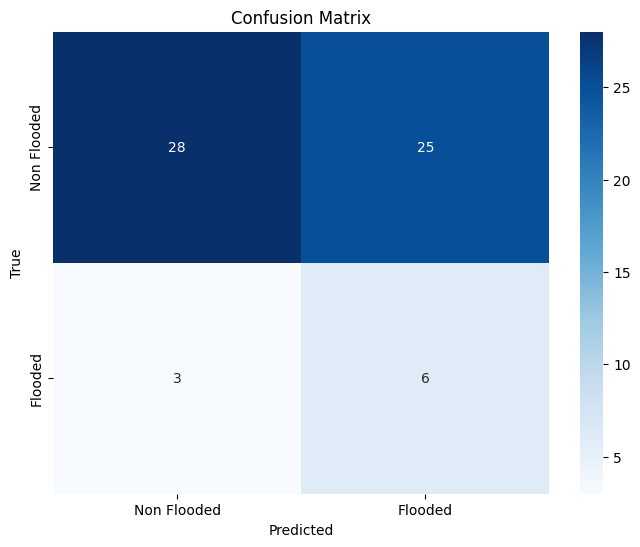

Accuracy: 0.5483870967741935
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.53      0.67        53
           1       0.19      0.67      0.30         9

    accuracy                           0.55        62
   macro avg       0.55      0.60      0.48        62
weighted avg       0.80      0.55      0.61        62



In [5]:
def load_pickle(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data


test_images, test_labels = load_pickle(floodnet_testing)
print(f'Testing images: {test_images.shape}')

class0 = len([i for i in test_labels if i == 0])
print(f'Class Balance: [0: {class0}, 1: {len(test_labels)-class0}]')

predictions = model.predict(test_images)

predicted_labels = (predictions > 0.5).astype(int)

conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Flooded', 'Flooded'], yticklabels=['Non Flooded', 'Flooded'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(f'Accuracy: {accuracy_score(test_labels, predicted_labels)}')
print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

### AIDER

Testing images: (739, 256, 256, 3)
Class Balance: [0: 659, 1: 80]
24/24 [==============================] - 11s 460ms/step


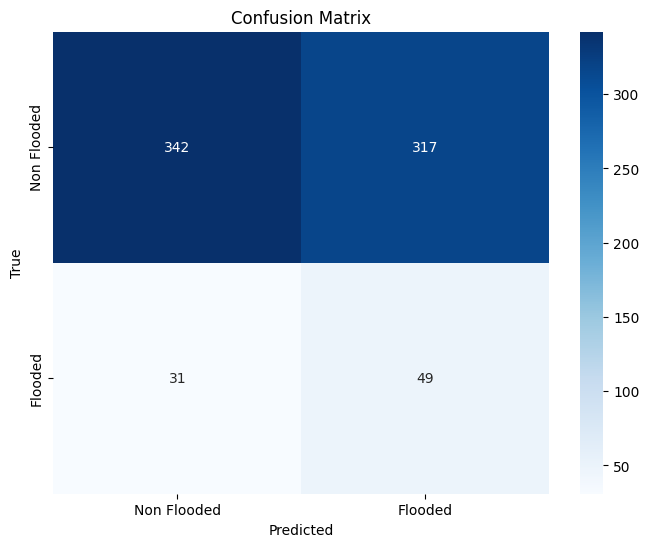

Accuracy: 0.5290933694181326
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.52      0.66       659
           1       0.13      0.61      0.22        80

    accuracy                           0.53       739
   macro avg       0.53      0.57      0.44       739
weighted avg       0.83      0.53      0.61       739



In [6]:
def load_pickle(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data


test_images, test_labels = load_pickle(aider_testing)
print(f'Testing images: {test_images.shape}')

class0 = len([i for i in test_labels if i == 0])
print(f'Class Balance: [0: {class0}, 1: {len(test_labels)-class0}]')

predictions = model.predict(test_images)

predicted_labels = (predictions > 0.5).astype(int)

conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Flooded', 'Flooded'], yticklabels=['Non Flooded', 'Flooded'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(f'Accuracy: {accuracy_score(test_labels, predicted_labels)}')
print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

### FloodAreaSegmentation

Testing images: (44, 256, 256, 3)
Class Balance: [0: 0, 1: 44]
2/2 [==============================] - 1s 219ms/step


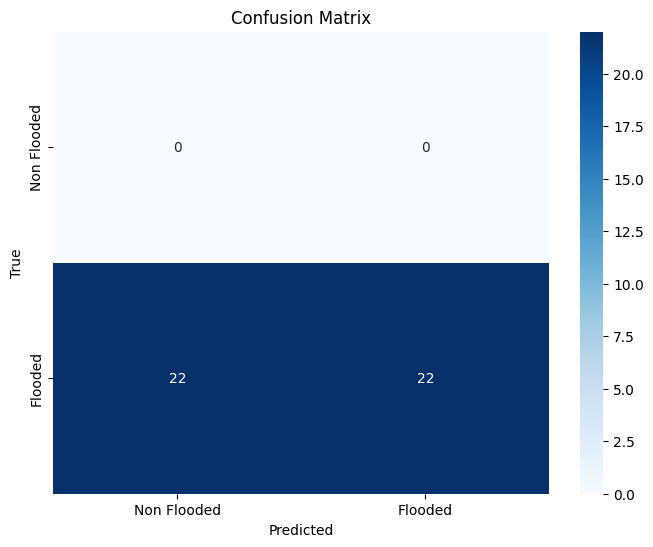

Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67        44

    accuracy                           0.50        44
   macro avg       0.50      0.25      0.33        44
weighted avg       1.00      0.50      0.67        44



c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [7]:
def load_pickle(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data


test_images, test_labels = load_pickle(floodAreaSeg_testing)
print(f'Testing images: {test_images.shape}')

class0 = len([i for i in test_labels if i == 0])
print(f'Class Balance: [0: {class0}, 1: {len(test_labels)-class0}]')

predictions = model.predict(test_images)

predicted_labels = (predictions > 0.5).astype(int)

conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Flooded', 'Flooded'], yticklabels=['Non Flooded', 'Flooded'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(f'Accuracy: {accuracy_score(test_labels, predicted_labels)}')
print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

### Google Images

Testing images: (145, 256, 256, 3)
Class Balance: [0: 52, 1: 93]
5/5 [==============================] - 3s 450ms/step


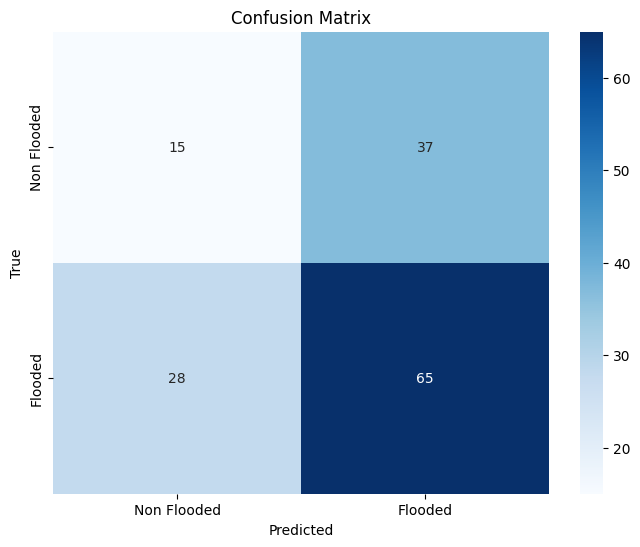

Accuracy: 0.5517241379310345
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.29      0.32        52
           1       0.64      0.70      0.67        93

    accuracy                           0.55       145
   macro avg       0.49      0.49      0.49       145
weighted avg       0.53      0.55      0.54       145



In [5]:
def load_pickle(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data


test_images, test_labels = load_pickle(download_testing)
print(f'Testing images: {test_images.shape}')

class0 = len([i for i in test_labels if i == 0])
print(f'Class Balance: [0: {class0}, 1: {len(test_labels)-class0}]')

predictions = model.predict(test_images)

predicted_labels = (predictions > 0.5).astype(int)

conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Flooded', 'Flooded'], yticklabels=['Non Flooded', 'Flooded'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(f'Accuracy: {accuracy_score(test_labels, predicted_labels)}')
print("Classification Report:")
print(classification_report(test_labels, predicted_labels))